# Principal Component Analysis with Cancer Data

In [383]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [384]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [385]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

### Id columns is to identify rows hence it has been dropped from dataset for further analysis.

In [386]:
df1 = df.drop('ID',axis = 1)
df1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

### Shape of Dataset after dropping ID column.

In [387]:
df.shape

(699, 11)

> - Given dataset have **699** rows and **11** columns.

### Datatype of each column for give dataset.

In [388]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

> - As per given dataset description all columns except 'ID' having numerical value but column 'Bare Nuclei' is of object type.
> - So there is possibility of having data error in 'Bare Nuclei' column.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [389]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [390]:
df[df['Bare Nuclei'].apply(lambda x: not x.isnumeric())]['Bare Nuclei']

23     ?
40     ?
139    ?
145    ?
158    ?
164    ?
235    ?
249    ?
275    ?
292    ?
294    ?
297    ?
315    ?
321    ?
411    ?
617    ?
Name: Bare Nuclei, dtype: object

In [391]:
df[df['Bare Nuclei'] == '?']['Bare Nuclei'].count()

16

In [392]:
16/699

0.022889842632331903

> - 'Bare Nuclei' is having **'?'** in **16** rows.
> - We can either replace is with mean, median, mode as necessary or remove particular rows.
> - It's better to replace **'?'** with **mode** of 'Bare Column' as it occupies around 60% of 'Bare Nuclei'.

### 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
### Here we would like to impute it with suitable values i.e. mode

In [393]:
mode_df = df['Bare Nuclei'].mode()[0]

In [394]:
df['Bare Nuclei'].replace('?',mode_df,inplace = True)

In [395]:
df[df['Bare Nuclei'].apply(lambda x: not x.isnumeric())]['Bare Nuclei']

Series([], Name: Bare Nuclei, dtype: object)

In [396]:
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [397]:
df['Bare Nuclei'] = df['Bare Nuclei'].apply(pd.to_numeric, errors='ignore')

In [398]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().sum().sum()

0

In [399]:
df.isna().sum().sum()

0

> - There are no missing values in Dataset

In [400]:
df[df.duplicated()].shape

(9, 11)

In [401]:
df_drop = df.drop_duplicates(keep = 'first')

In [402]:
df_drop.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [403]:
df_drop.shape

(690, 11)

In [404]:
df_drop.drop('ID',axis = 1,inplace=True)

C:\Users\Bhagoda\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [406]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [407]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(10)
memory usage: 59.3 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


### Check for correlation of variable

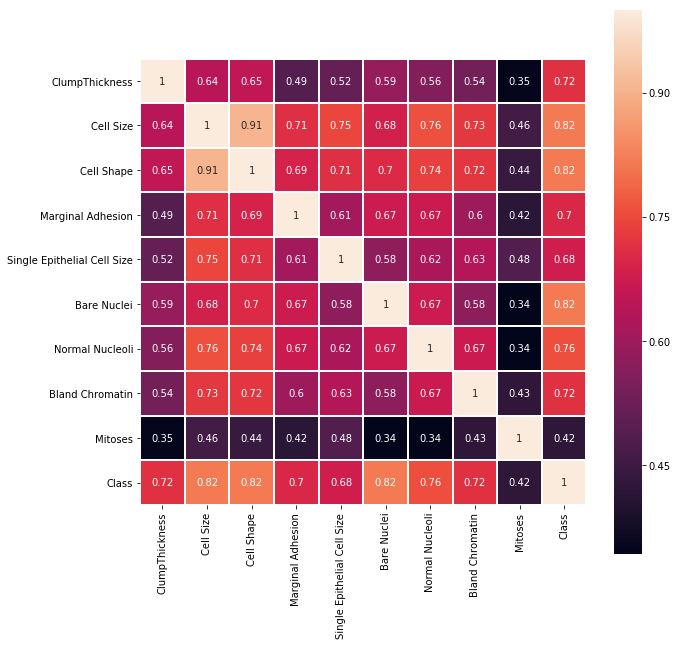

In [408]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_drop.corr(),annot = True,linewidths=1,square=True)

> - Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
> - Target variable shows high correlation with most of these variables

### Let us check for pair plots

C:\Users\Bhagoda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


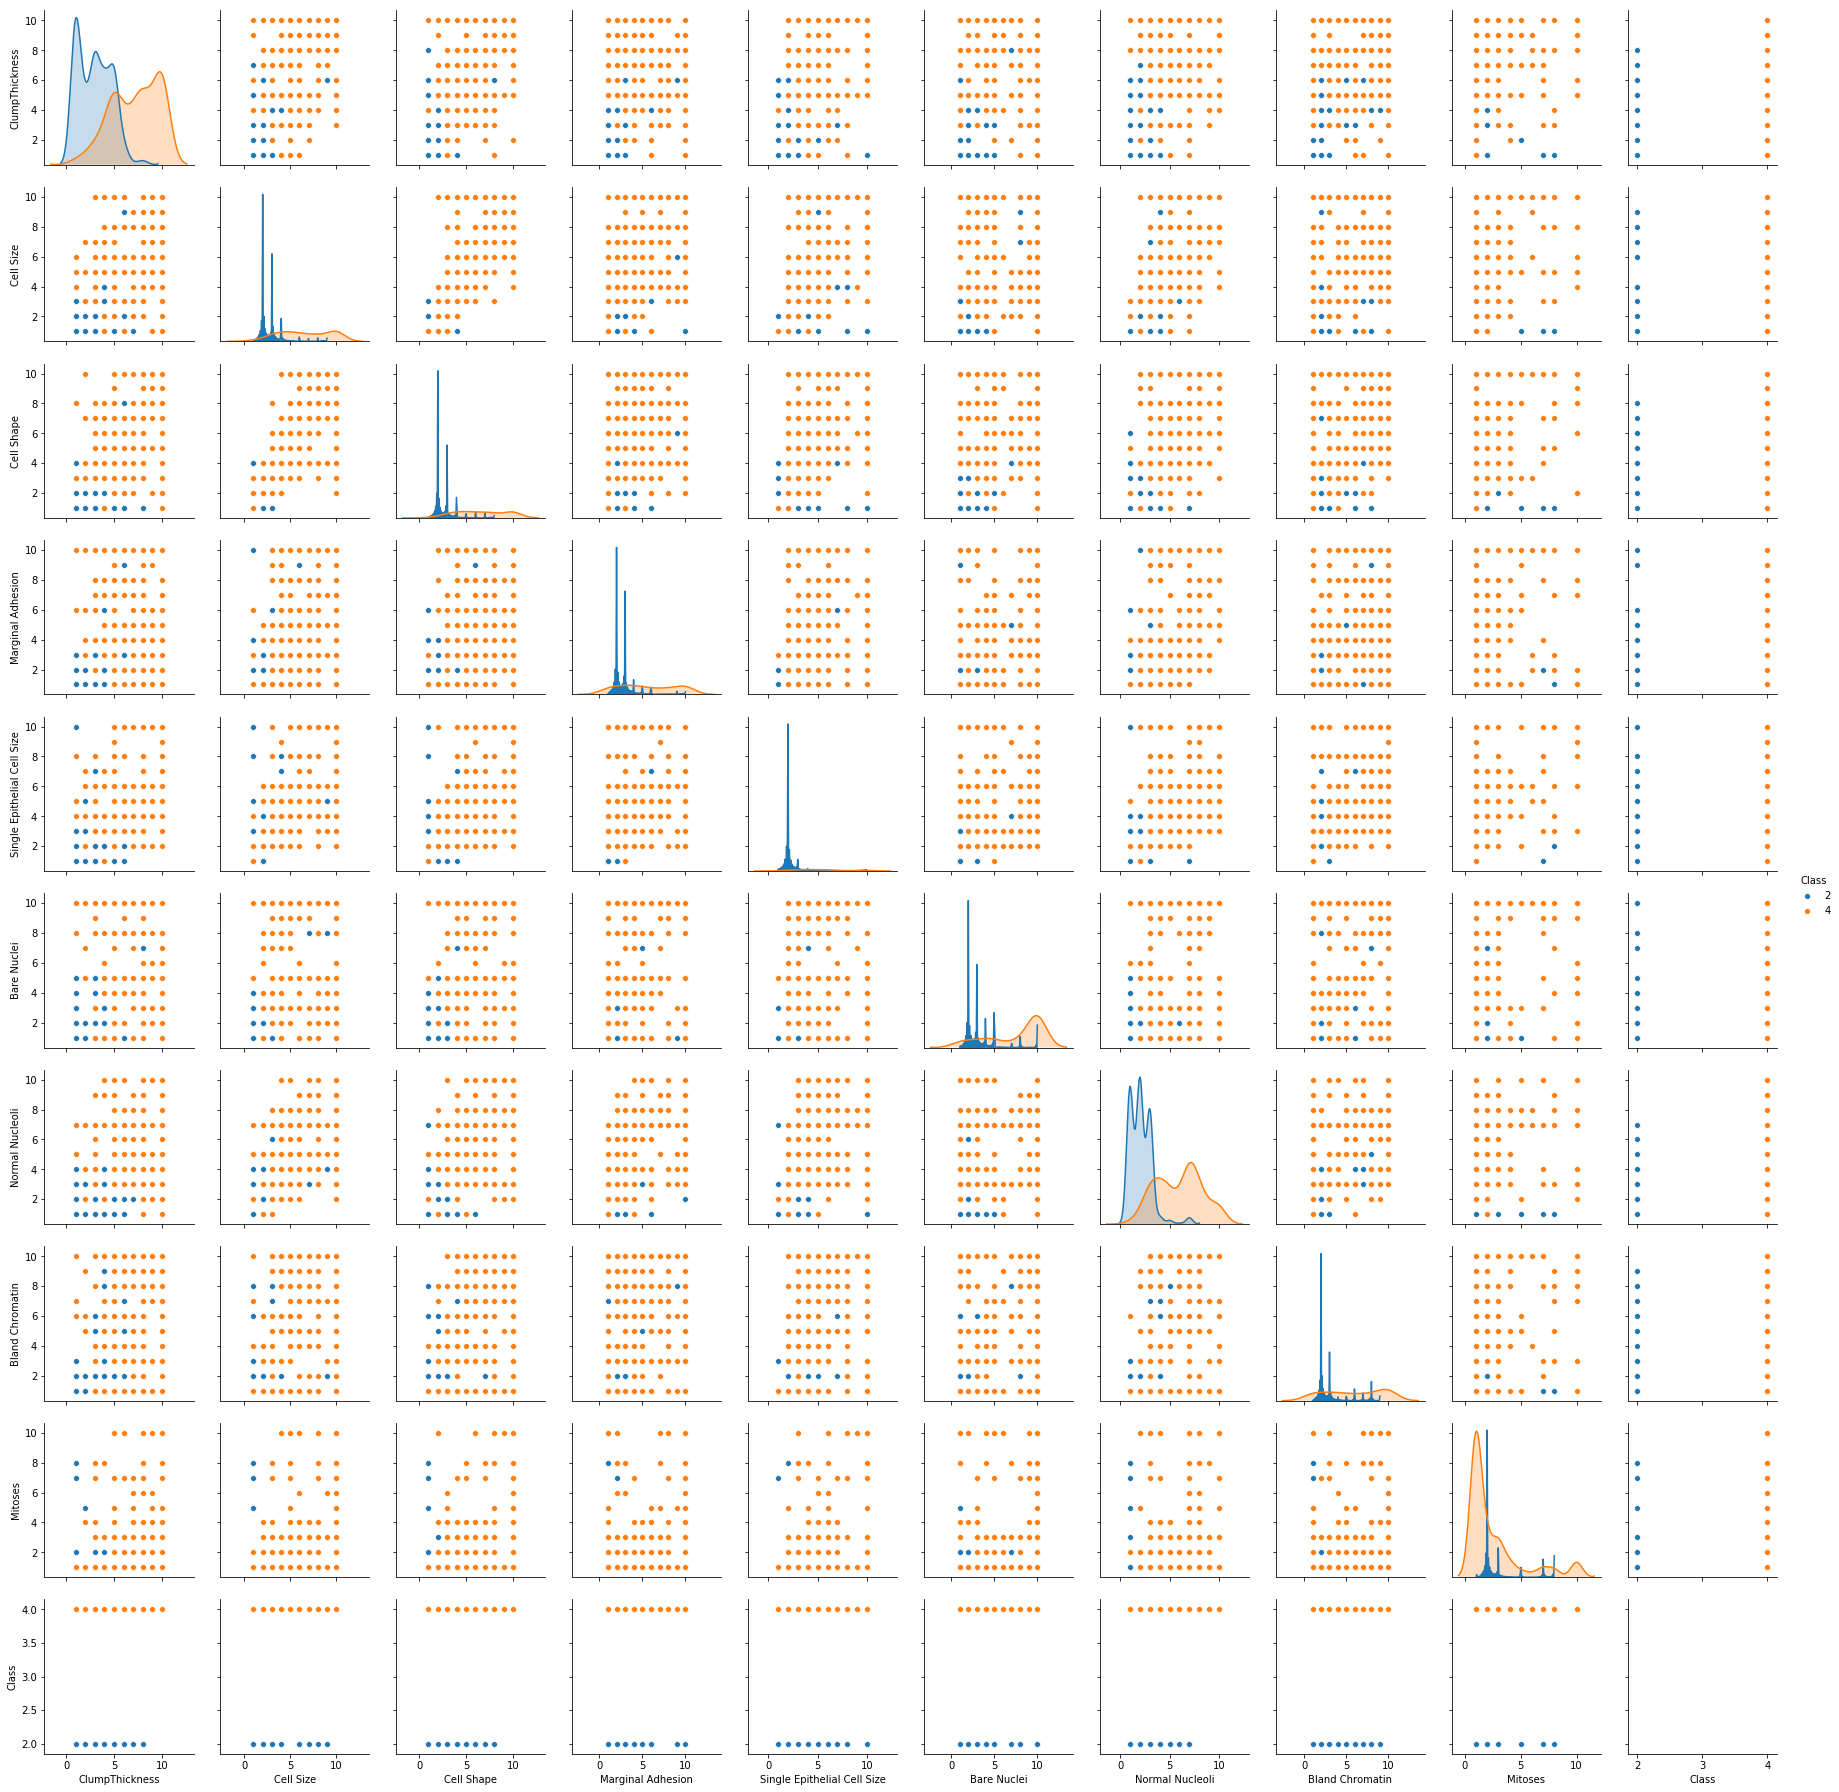

In [409]:
sns.pairplot(df_drop,hue='Class');

> - Relationship between variables shows some correlation. 
> -  Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

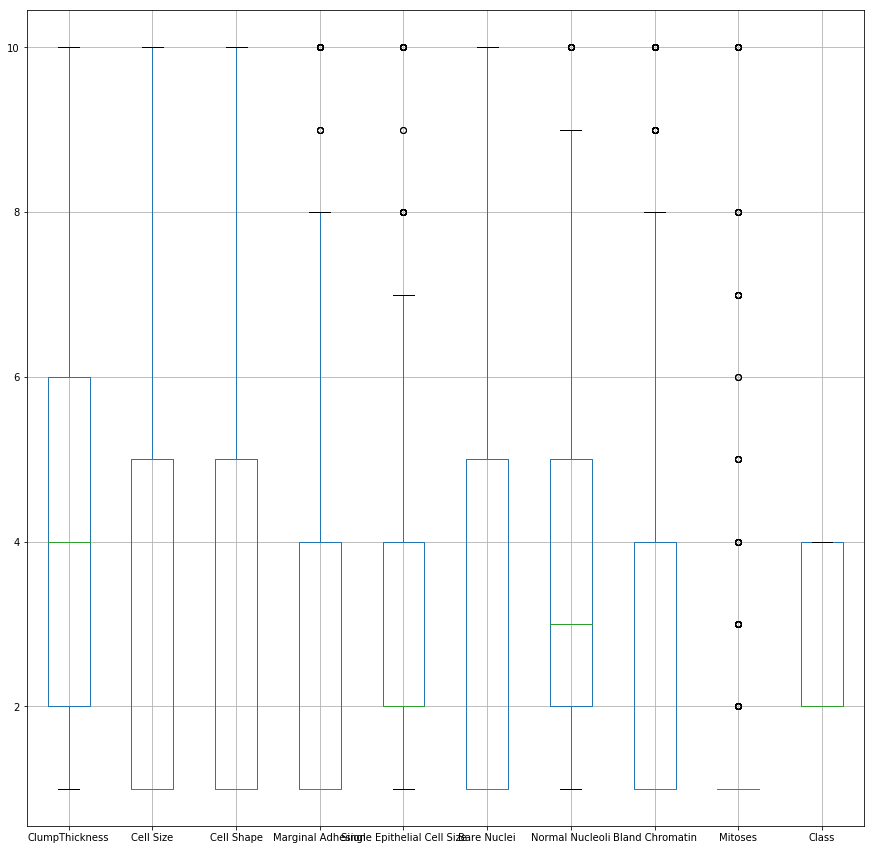

In [410]:
df_drop.boxplot(figsize = (15,15));

In [411]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 
for i in df_drop.columns:
    print("Outliers in {} coloumn are on indices  = \n".format(i), str(outliers_iqr(df_drop[i])),'\n\n')

Outliers in ClumpThickness coloumn are on indices  = 
 (array([], dtype=int64),) 


Outliers in Cell Size coloumn are on indices  = 
 (array([], dtype=int64),) 


Outliers in Cell Shape coloumn are on indices  = 
 (array([], dtype=int64),) 


Outliers in Marginal Adhesion coloumn are on indices  = 
 (array([ 14,  20,  38,  40,  73,  99, 104, 107, 112, 117, 132, 167, 173,
       187, 188, 191, 205, 209, 212, 213, 250, 256, 259, 260, 277, 279,
       280, 281, 299, 307, 317, 341, 346, 353, 354, 359, 360, 418, 433,
       472, 475, 480, 481, 486, 487, 499, 507, 516, 539, 557, 561, 578,
       580, 600, 602, 603, 604, 640, 672, 673], dtype=int64),) 


Outliers in Single Epithelial Cell Size coloumn are on indices  = 
 (array([ 32,  42,  43,  44,  53,  54,  62,  67,  71,  84,  85,  98, 100,
       104, 107, 113, 122, 123, 124, 129, 132, 148, 149, 166, 173, 175,
       177, 191, 201, 220, 228, 235, 257, 260, 280, 281, 297, 307, 337,
       350, 351, 353, 359, 405, 409, 414, 418, 475, 562, 60

In [413]:
for i in df_drop.columns:
    up_whisk= df_drop[i].quantile(0.75)+1.5*(df_drop[i].quantile(0.75) - df_drop[i].quantile(0.25))
    for j in df_drop[i]:
        if(j > up_whisk):
            df_drop[i]=df_drop[i].replace(j,up_whisk)

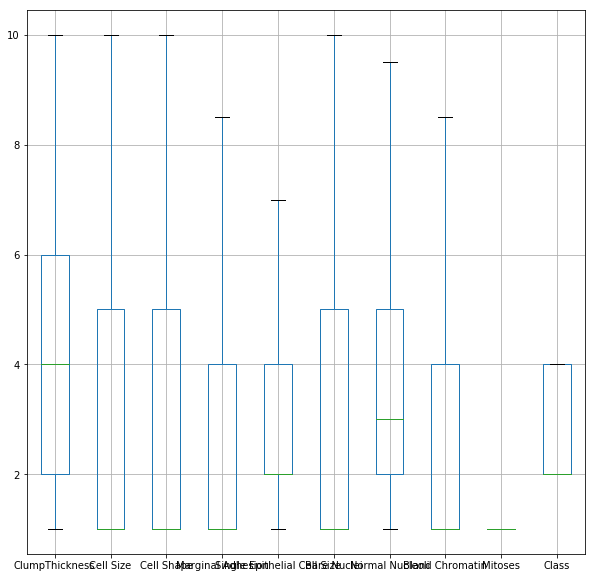

In [414]:
df_drop.boxplot(figsize = (10,10))

In [415]:
df_pca = df_drop[['Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Normal Nucleoli', 'Bland Chromatin']]
df_pca.head()

,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin
0,1,1,1.0,2,3.0,1.0
1,4,4,5.0,7,3.0,2.0
2,1,1,1.0,2,3.0,1.0
3,8,8,1.0,3,3.0,7.0
4,1,1,3.0,2,3.0,1.0


In [416]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [417]:
X = df_pca

X_std = StandardScaler().fit_transform(X)

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [418]:
X_std

array([[-0.70169775, -0.74503981, -0.66249431, -0.59257896, -0.17539674,
        -0.63362989],
       [ 0.28506471,  0.26891969,  0.89233928,  2.23507997, -0.17539674,
        -0.26974756],
       [-0.70169775, -0.74503981, -0.66249431, -0.59257896, -0.17539674,
        -0.63362989],
       ...,
       [ 2.25858965,  2.2968387 ,  0.11492248,  2.23507997,  1.90404914,
         2.09548763],
       [ 1.600748  ,  0.9448927 ,  0.50363088, -0.02704717,  2.5278829 ,
         1.18578179],
       [ 1.600748  ,  1.6208657 ,  0.89233928,  0.53848461,  2.5278829 ,
         0.45801711]])

# Q6 Create a covariance matrix for identifying Principal components

### PCA
> - **Step 1 - Create covariance matrix**

In [419]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix : \n\n ', cov_matrix)

Covariance Matrix : 

  [[1.00145138 0.9066632  0.72800861 0.78174972 0.76104659 0.73121148]
 [0.9066632  1.00145138 0.70364309 0.75160088 0.7400641  0.72792357]
 [0.72800861 0.70364309 1.00145138 0.66418897 0.68518449 0.62551067]
 [0.78174972 0.75160088 0.66418897 1.00145138 0.65988131 0.68920344]
 [0.76104659 0.7400641  0.68518449 0.65988131 1.00145138 0.6767848 ]
 [0.73121148 0.72792357 0.62551067 0.68920344 0.6767848  1.00145138]]


# Q7 Identify eigen values and eigen vector

> - **Step 2- Get eigen values and eigen vector**

In [420]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [421]:
print('Eigen Vectors :\n\n', eig_vecs)

Eigen Vectors :

 [[ 0.43572491 -0.75306514  0.30898669  0.06896673  0.16881714  0.33809508]
 [ 0.42881857  0.65108327  0.46153825  0.11590888  0.13934308  0.38253927]
 [ 0.38830622  0.02869302  0.15658562 -0.74127044  0.1482069  -0.50242292]
 [ 0.4020526   0.07687574 -0.62682718  0.28289752  0.58649141 -0.12461275]
 [ 0.39955401  0.04087875 -0.50147553 -0.27882003 -0.59790467  0.38984255]
 [ 0.39266655 -0.02406722  0.15033496  0.52398019 -0.47818075 -0.5651735 ]]


In [422]:
print('\n Eigen Values :\n\n', eig_vals)


 Eigen Values :

 [4.62068508 0.09208516 0.2593931  0.38578362 0.33823721 0.31252411]


# Q8 Find variance and cumulative variance by each eigen vector

> - **Step 3- Find Variance**

In [423]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]

> - **Step 4- cumulative variance**

In [424]:
cum_var_exp = np.cumsum(var_exp)

In [425]:
print("Cumulative Variance Explained :\n\n", cum_var_exp)

Cumulative Variance Explained :

 [ 76.89980717  83.32021573  88.94933259  94.15051889  98.46747168
 100.        ]


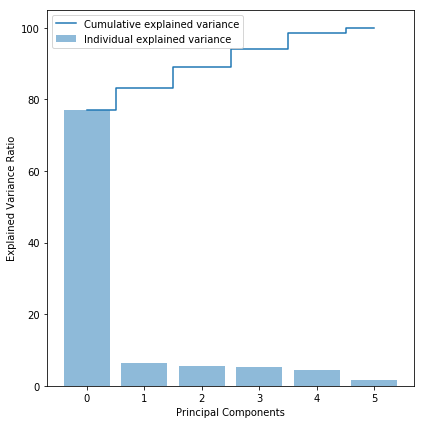

In [427]:
plt.figure(figsize=(6,6))
plt.bar(range(6), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(6), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

> + First four principal components explain more than 90% of the variance in the data. The first three PCA is shown below.

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

- **To getter a better understanding of interaction of the dimensions**

- **plot the first three PCA dimensions**

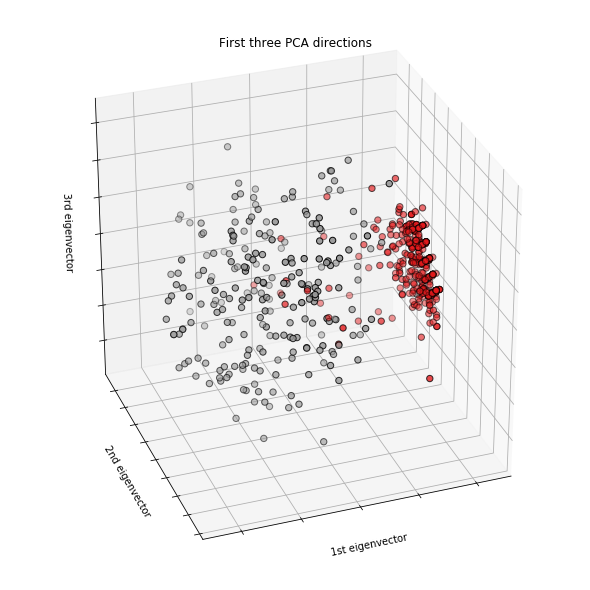

In [439]:
from mpl_toolkits.mplot3d import Axes3D
y = df_drop['Class']
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=4).fit_transform(df_drop)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Q10 Find correlation between components and features

In [440]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.4396184 ,  1.30864684, -1.4396184 , ...,  4.49589405,
         2.76300452,  3.14541687],
       [-0.09440759, -0.07077423, -0.09440759, ...,  1.53620846,
        -0.24455668, -0.67569017],
       [-0.2601433 ,  1.76256057, -0.2601433 , ..., -0.11123698,
        -1.61777442, -0.7862904 ],
       [ 0.17418139, -0.44352278,  0.17418139, ...,  0.86395519,
         0.96830218,  1.37243323],
       [-0.30027167, -1.00167876, -0.30027167, ..., -0.26486961,
        -0.06287775, -0.15392338]])

In [441]:
pca.components_

array([[ 0.43572491,  0.42881857,  0.38830622,  0.4020526 ,  0.39955401,
         0.39266655],
       [ 0.06896673,  0.11590888, -0.74127044,  0.28289752, -0.27882003,
         0.52398019],
       [ 0.16881714,  0.13934308,  0.1482069 ,  0.58649141, -0.59790467,
        -0.47818075],
       [ 0.33809508,  0.38253927, -0.50242292, -0.12461275,  0.38984255,
        -0.5651735 ],
       [ 0.30898669,  0.46153825,  0.15658562, -0.62682718, -0.50147553,
         0.15033496]])

Text(0.5, 1.0, 'Correlation between different features')

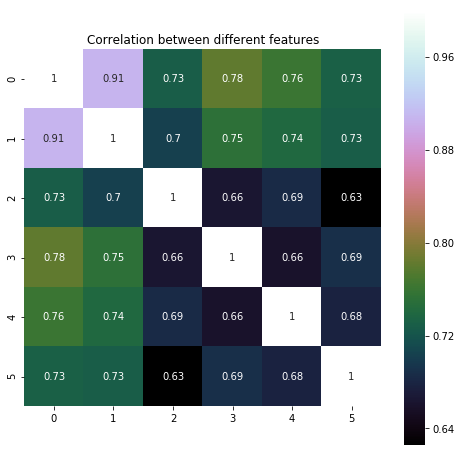

In [443]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_matrix, vmax=1, square=True,annot=True,cmap='cubehelix');

plt.title('Correlation between different features')

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [429]:
jokes = pd.read_csv('jokes.csv')
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [430]:
ratings = jokes.iloc[0:200,:]

# Q13 Change the column indices from 0 to 99

In [431]:
s=['NumJokes']
for i in range(0,100):
    s.append(i)

In [432]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [433]:
ratings.columns = s

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [434]:
ratings.replace(99.00,0)

,NumJokes,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [435]:
sc1 = StandardScaler()
ratings_diff = pd.DataFrame(sc1.fit_transform(ratings))

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [436]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.178514,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,1.371667,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,-0.968748,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,-1.014639,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,0.958652,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [437]:
rank = ratings_diff.mean()

In [438]:
pd.DataFrame(rank.sort_values(ascending=False)).head(10)

,0
88,2.831069e-16
85,2.642331e-16
4,2.536860e-16
96,2.342571e-16
73,2.153833e-16
71,1.743050e-16
94,1.676437e-16
84,1.665335e-16
97,1.476597e-16
64,1.426637e-16
